In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filters = ['iters1000', "2022-05-04" ]

In [3]:
base_dir = "evaluation_results"
result_jsons = [
    os.path.join(base_dir, f) for f in os.listdir(base_dir) if 
    f.endswith('.json') and all(pattern in f for pattern in filters)
]
result_jsons

['evaluation_results/2022-05-04_14-36-49-Sub20x20-random-iters1000.json',
 'evaluation_results/2022-05-04_14-40-03-Sub20x20-expert-iters1000.json',
 'evaluation_results/2022-05-04_14-41-04-Sub20x20-ppo-seed1maskable-iters1000.json',
 'evaluation_results/2022-05-04_14-39-10-Sub20x20-naive-iters1000.json',
 'evaluation_results/2022-05-04_14-44-58-Sub20x20-ppo-maskable-iters1000.json']

In [4]:
results = {
    fname.split('-')[-2]: {"rewards": json.load(open(fname, 'r'))["rewards"]} for fname in result_jsons
}

In [5]:
algo_to_res = {
    fname: {
        'mean': np.mean(result['rewards']),
        'std': np.std(result['rewards']),
        'median': np.median(result['rewards']),
    }
    for fname, result in results.items()
}
algo_to_res

{'random': {'mean': -82.1565,
  'std': 60.87816684986498,
  'median': -70.35000000000001},
 'expert': {'mean': -20.444625, 'std': 41.5653870033033, 'median': -0.525},
 'seed1maskable': {'mean': -24.585974999999998,
  'std': 40.49439288561288,
  'median': -0.6},
 'naive': {'mean': -22.76035,
  'std': 40.878623360841054,
  'median': -0.7000000000000001},
 'maskable': {'mean': -28.019225,
  'std': 44.22263776646951,
  'median': -0.8500000000000004}}

In [6]:
all_rewards = [
    res['rewards'] for algo, res in results.items() if algo != "random"
]
labels = [a for a in results.keys() if a != "random"]

/tmp/ipykernel_222158/2439135854.py:5: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


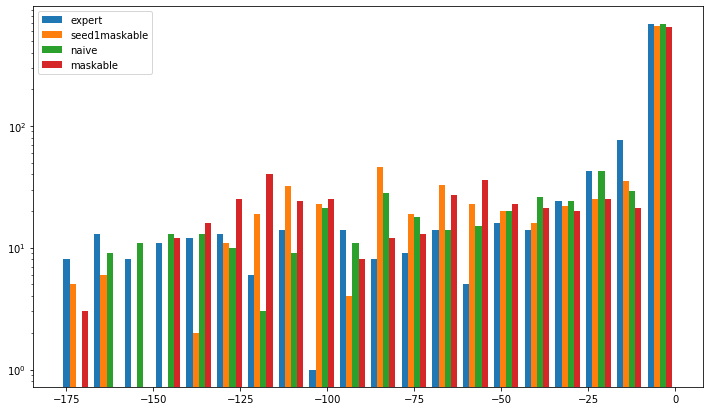

In [7]:
plt.figure(figsize=(12, 7))
plt.hist(all_rewards, 20, label=labels)
# plt.xticks(list(range(1, len(results) + 1)), list(results.keys()))
plt.legend(loc='best')
plt.yscale('log', nonposy='clip')

In [103]:
rewards = {k: r['rewards'] for k, r in results.items() if k not in {"maskable5m", "random"}}
zipped = list(zip(rewards.values()))

In [104]:
y = list(rewards.values())

In [165]:
print(tuple(rewards.keys()))

winners = []

for idx, v in enumerate(zip(*y)):
    v = tuple(round(z, 2) for z in v)
    v_np = np.array(v)
    winner = np.argmax(v_np)
    winner = tuple(rewards.keys())[winner]
#     if (np.abs(v_np[0] - v_np[1]) >= 50 or np.abs(v_np[2] - v_np[1]) >= 50) and winner == "maskable":
    if winner != "maskable":
#     if winner == "maskable":
        print(idx, v, winner)
    winners.append(winner)

('expert', 'maskable', 'naive')
2 (-17.93, -22.97, -11.68) naive
4 (-30.6, -79.07, -39.78) expert
5 (-0.03, -0.03, -0.03) expert
6 (-0.88, -0.5, -0.35) naive
7 (-9.3, -22.17, -4.5) naive
10 (-0.03, -0.05, -0.03) expert
13 (-47.93, -22.0, -19.8) naive
14 (-51.53, -99.25, -79.12) expert
15 (-0.08, -1.32, -0.08) expert
17 (-0.03, -0.05, -0.03) expert
19 (-0.5, -5.77, -3.23) expert
20 (-4.05, -2.33, -2.32) naive
25 (-4.02, -21.18, -140.4) expert
30 (-33.45, -35.93, -13.8) naive
33 (-90.27, -83.9, -44.95) naive
36 (-18.83, -55.58, -34.15) expert
37 (-9.22, -13.27, -102.9) expert
41 (-0.03, -0.03, -0.03) expert
42 (-0.03, -2.87, -0.03) expert
43 (-0.08, -21.8, -0.08) expert
44 (-0.08, -1.32, -0.08) expert
47 (-0.03, -2.87, -0.03) expert
48 (-146.62, -119.1, -101.08) naive
49 (-16.5, -15.08, -8.45) naive
51 (-0.15, -0.25, -0.15) expert
52 (-0.03, -0.03, -0.03) expert
56 (-154.25, -138.1, -108.13) naive
59 (-0.15, -27.0, -0.15) expert
60 (-0.08, -0.08, -0.08) expert
65 (-0.08, -0.22, -0.12) ex

In [ ]:
]

In [137]:
expert_r = np.array(rewards['expert'])
maskable_r = np.array(rewards['maskable'])

(array([  5.,   2.,  14.,  20.,  57.,  39., 677., 143.,  33.,  10.]),
 array([-169.775 , -144.6575, -119.54  ,  -94.4225,  -69.305 ,  -44.1875,
         -19.07  ,    6.0475,   31.165 ,   56.2825,   81.4   ]),
 <BarContainer object of 10 artists>)

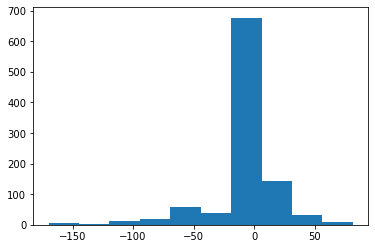

In [140]:
plt.hist(maskable_r - expert_r)

In [110]:
from collections import Counter

Counter(winners)

Counter({'maskable': 469, 'naive': 164, 'expert': 367})